In [7]:
import pandas as pd

# Reading data
df = pd.read_csv("Titanic.csv")
df.head(5)


df.set_index("PassengerId", inplace=True)
print("\nData with PassengerId as index:")
print(df.head())


selected_columns = ['Name', 'Sex', 'Survived','Age']
print("\nSelected Columns:")
df = df[selected_columns]
# print(selected_columns.head())
df

survived_passengers = df[df.Survived == 1]
print("\nPassengers who survived:")
print(survived_passengers.head())


sorted_data = df.sort_values(by="Age", ascending=True)
print("\nData sorted by Age:")
print(sorted_data.head())


df.describe()

df.dtypes



Data with PassengerId as index:
             Survived  Pclass                                          Name  \
PassengerId                                                                   
892                 0       3                              Kelly, Mr. James   
893                 1       3              Wilkes, Mrs. James (Ellen Needs)   
894                 0       2                     Myles, Mr. Thomas Francis   
895                 0       3                              Wirz, Mr. Albert   
896                 1       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   

                Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
PassengerId                                                               
892            male  34.5      0      0   330911   7.8292   NaN        Q  
893          female  47.0      1      0   363272   7.0000   NaN        S  
894            male  62.0      0      0   240276   9.6875   NaN        Q  
895            male  27.0      0      

,0
Name,object
Sex,object
Survived,int64
Age,float64


In [8]:
import pandas as pd

# Load Telecom_Churn dataset (replace with your actual file path)
file_csv = r"Telecom Churn.csv"

# Reading data from CSV
data = pd.read_csv(file_csv)
print("\nData loaded successfully from CSV.\n")
print(data.head())

# Computing and displaying summary statistics for each feature
for column in data.select_dtypes(include=['float64', 'int64']):  # Considering only numerical columns
    print(f"\nStatistics for {column}:")
    print(f"Minimum Value: {data[column].min()}")
    print(f"Maximum Value: {data[column].max()}")
    print(f"Mean: {data[column].mean()}")
    print(f"Range: {data[column].max() - data[column].min()}")
    print(f"Standard Deviation: {data[column].std()}")
    print(f"Variance: {data[column].var()}")
    print(f"25th Percentile: {data[column].quantile(0.25)}")
    print(f"50th Percentile (Median): {data[column].median()}")
    print(f"75th Percentile: {data[column].quantile(0.75)}")




Data loaded successfully from CSV.

  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25155 entries, 0 to 25154
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                25155 non-null  int64 
 1   district                  25155 non-null  object
 2   price                     25155 non-null  object
 3   address                   25155 non-null  object
 4   AdUpdateDate              25155 non-null  object
 5   Category                  25155 non-null  object
 6   GrossSquareMeters         25155 non-null  object
 7   BuildingAge               25155 non-null  object
 8   NumberFloorsofBuilding    25155 non-null  int64 
 9   UsingStatus               25155 non-null  object
 10  EligibilityForInvestment  21506 non-null  object
 11  BuildStatus               11231 non-null  object
 12  TitleStatus               9712 non-null   object
 13  ItemStatus                18332 non-null  object
 14  NumberOfBathrooms     

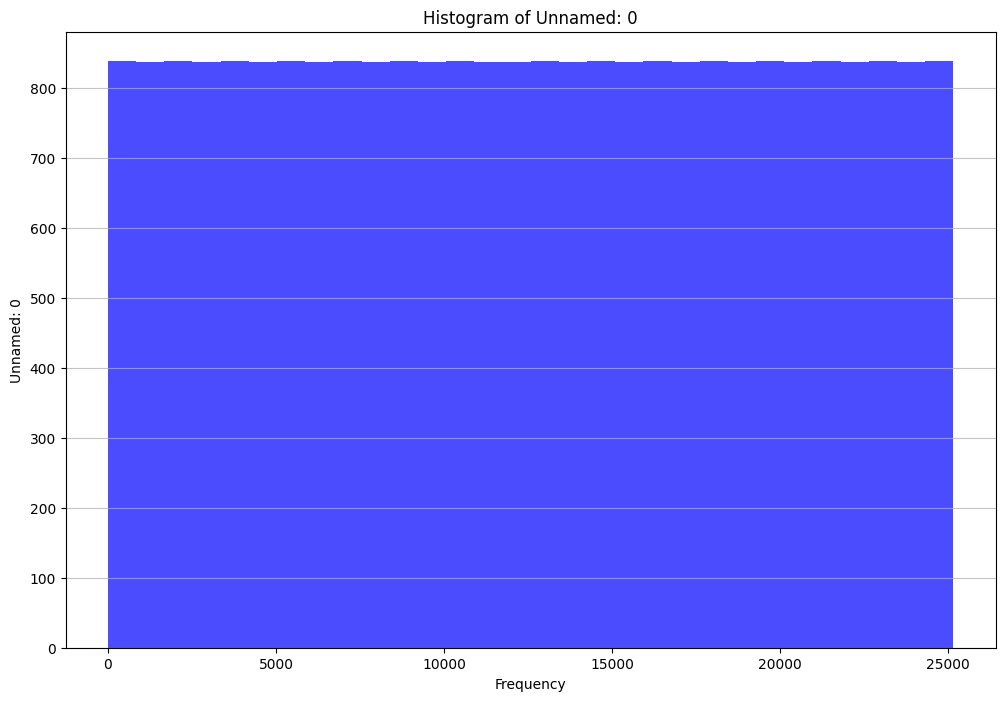

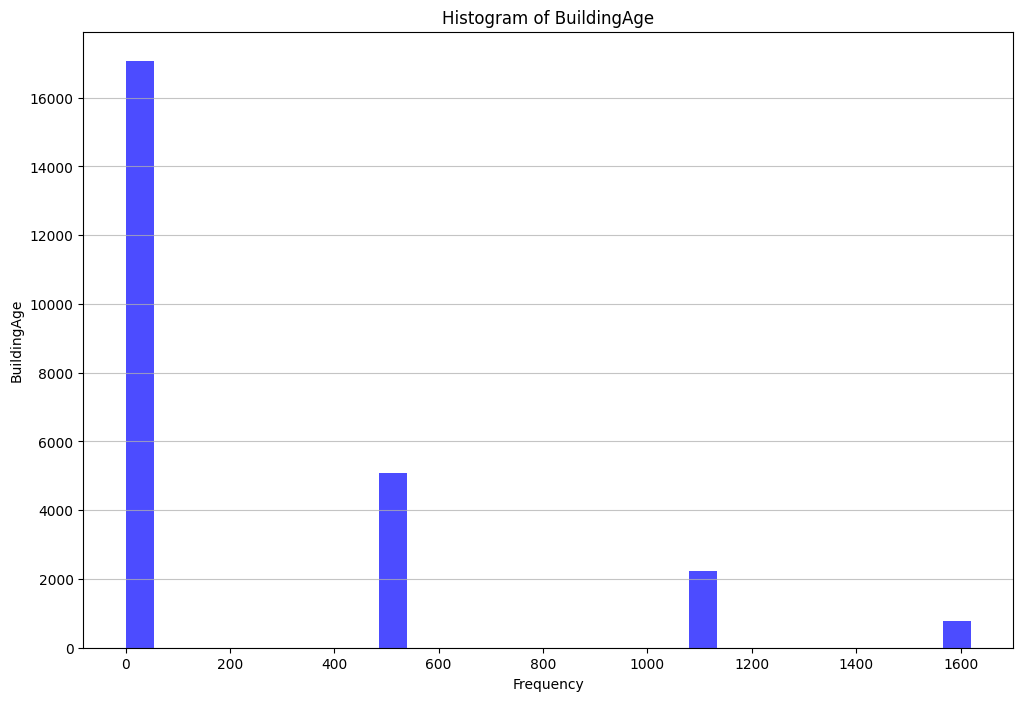

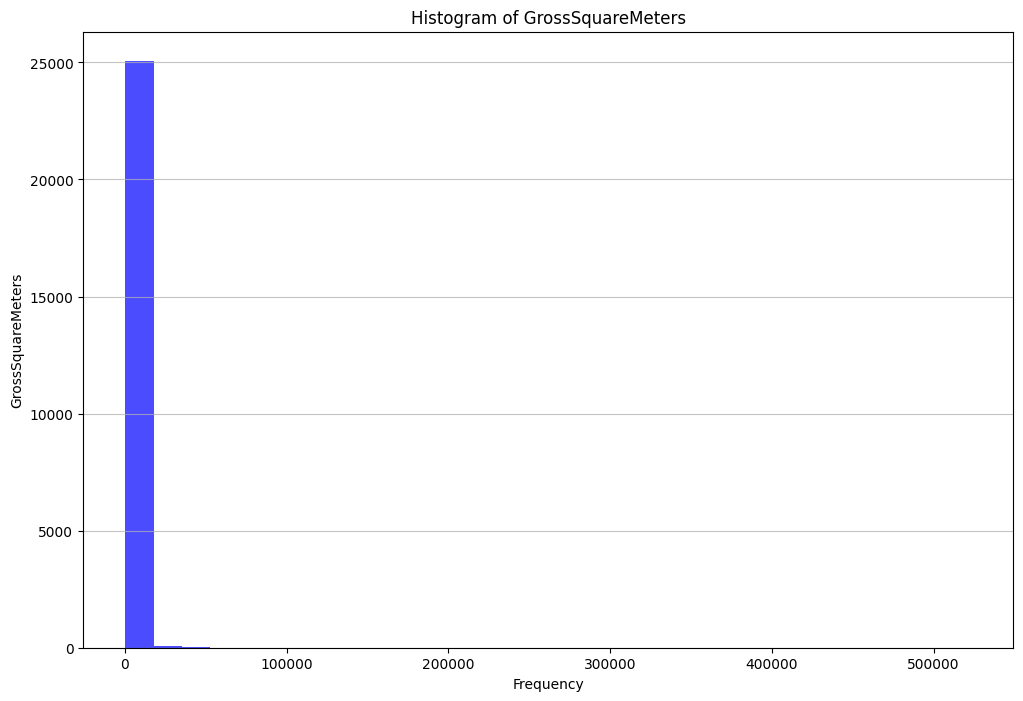

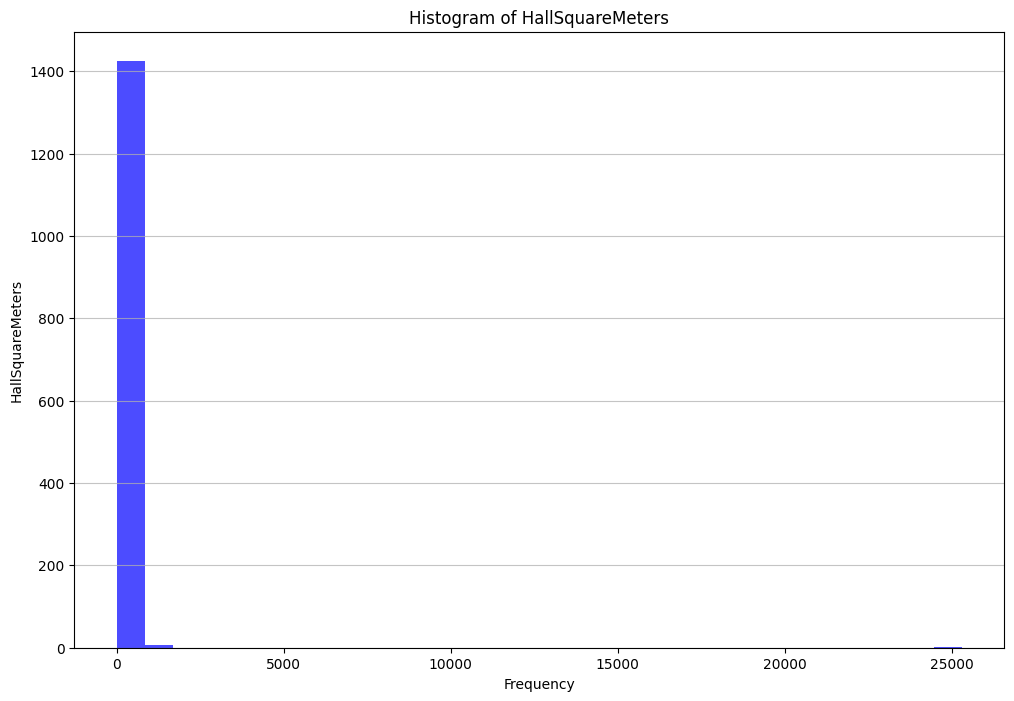

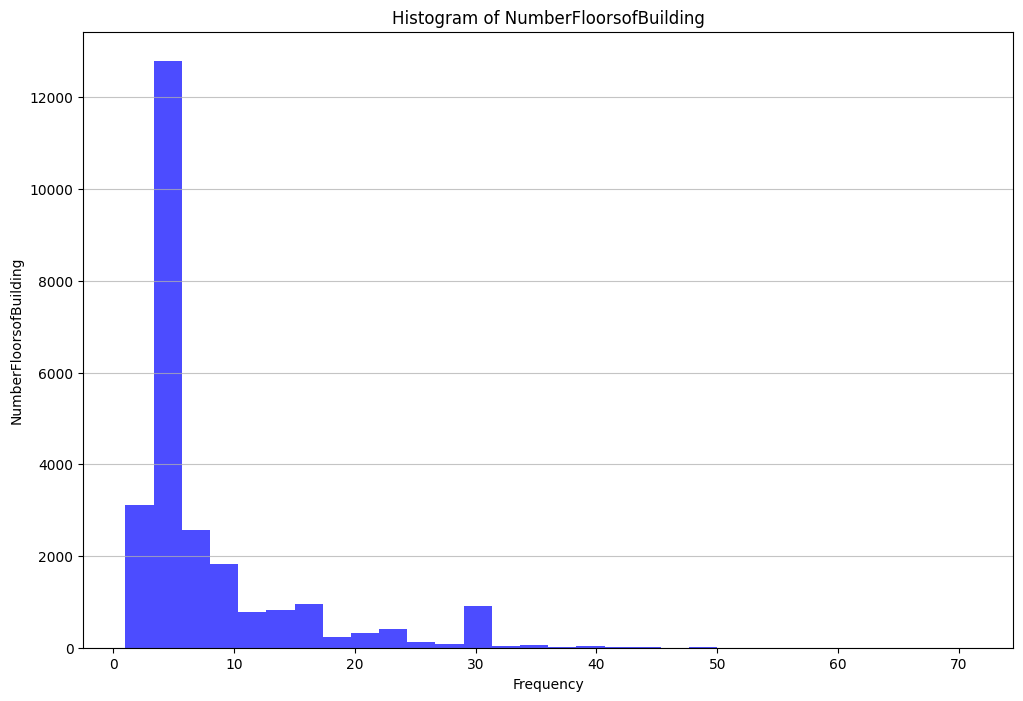

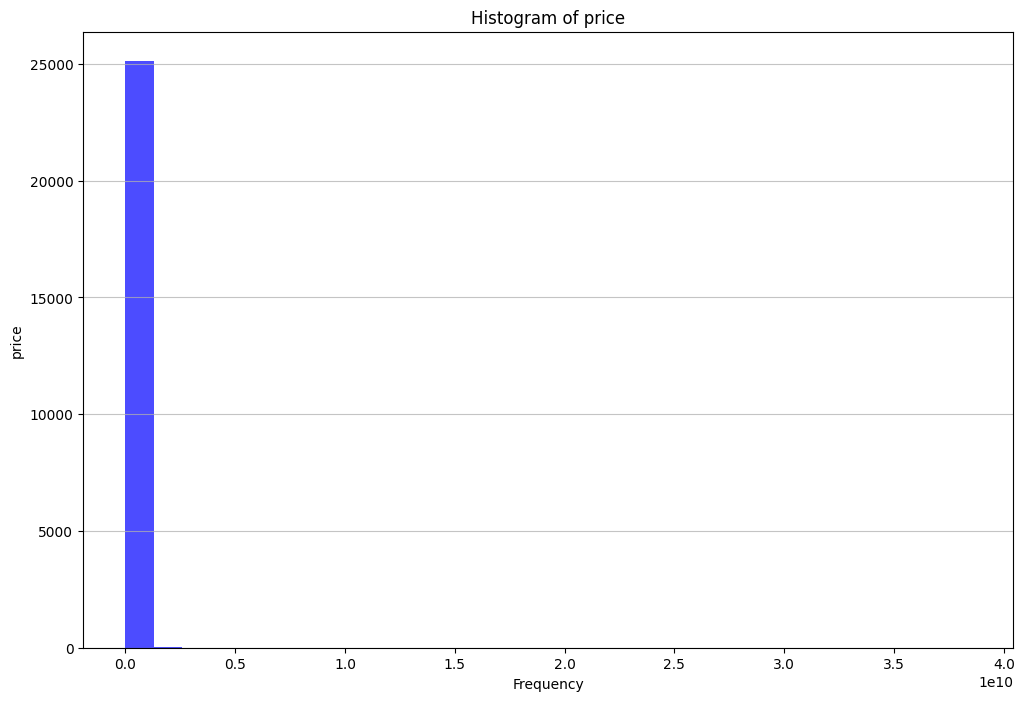

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("House Data.csv")
df.head(3)

df.info()

def to_numeric(column, char):
    return pd.to_numeric(column.str.replace(char, '',regex=True).str.strip(), errors='coerce')

df['price'] = to_numeric(df['price'], r'[^\d]')
df['BuildingAge'] = to_numeric(df['BuildingAge'], r'[^\d]')
df['GrossSquareMeters'] = to_numeric(df['GrossSquareMeters'], r'[^\d]')
df['HallSquareMeters'] = to_numeric(df['HallSquareMeters'], r'[^\d]')

int_col = ['Unnamed: 0', 'BuildingAge', 'GrossSquareMeters', 'HallSquareMeters', 'NumberFloorsofBuilding', 'price']
df_numeric = df[int_col]

df_numeric=df_numeric.dropna(how='all')

stdval = df_numeric.std()
print(stdval)

varval = df_numeric.var()
print(varval)

df_numeric

for col in df_numeric.columns:
    plt.figure(figsize=(12,8))
    plt.hist(df_numeric[col].dropna(), bins=30, alpha=0.7, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel("Frequency")
    plt.ylabel(col)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [10]:
import pandas as pd

# Load dataset
data1 = pd.read_csv('Lipstick.csv')
data = data1.drop('Id', axis=1)
# Function to calculate Gini index
def gini_index(classes):
    total = sum(classes)
    gini = 1 - sum((count / total) ** 2 for count in classes)
    return gini

# Function to calculate weighted Gini index for a feature
def weighted_gini(feature, target):
    total_samples = len(target)
    unique_values = feature.unique()
    weighted_gini_sum = 0

    for value in unique_values:
        subset = target[feature == value]
        subset_counts = subset.value_counts()
        subset_gini = gini_index(subset_counts)
        weighted_gini_sum += (len(subset) / total_samples) * subset_gini

    return weighted_gini_sum

# Function to determine the best feature for splitting
def find_best_feature(data, target_col):
    features = [col for col in data.columns if col != target_col]  # Exclude target column
    gini_values = {feature: weighted_gini(data[feature], data[target_col]) for feature in features}
    best_feature = min(gini_values, key=gini_values.get)
    return best_feature, gini_values

# Recursive function to build the decision tree
def build_decision_tree(data, target_col, depth=0, max_depth=None):
    target_counts = data[target_col].value_counts()
    # Stop if all data belongs to one class or no features remain
    if len(target_counts) == 1 or data.shape[1] == 1 or (max_depth and depth >= max_depth):
        return target_counts.idxmax()  # Return the majority class

    # Find the best feature for splitting
    best_feature, gini_values = find_best_feature(data, target_col)
    tree = {best_feature: {}}

    # Print the Gini index for each feature at the current level
    print(f"\nGini Indices at Depth {depth}:")
    for feature, gini in gini_values.items():
        print(f"Feature '{feature}': Gini = {gini:.3f}")
    if depth == 0:
        print(f"\nSelected Root Node: '{best_feature}' with Gini = {gini_values[best_feature]:.3f}")
    else:
        print(f"\nSelected Node: '{best_feature}' with Gini = {gini_values[best_feature]:.3f}")

    # Split the dataset by the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value].drop(columns=[best_feature])
        subtree = build_decision_tree(subset, target_col, depth + 1, max_depth)
        tree[best_feature][value] = subtree

    return tree

# Start by calculating Gini index for the target variable
target_counts = data['Buys'].value_counts()
gini_dataset = gini_index(target_counts)
print(f"Gini Index for the dataset: {gini_dataset:.3f}")

# Build the decision tree
decision_tree = build_decision_tree(data, target_col='Buys', max_depth=None)

# Display the decision tree
import pprint
print("\nFinal Decision Tree:")
pprint.pprint(decision_tree)

Gini Index for the dataset: 0.459

Gini Indices at Depth 0:
Feature 'Age': Gini = 0.343
Feature 'Income': Gini = 0.440
Feature 'Gender': Gini = 0.367
Feature 'Ms': Gini = 0.449

Selected Root Node: 'Age' with Gini = 0.343

Gini Indices at Depth 1:
Feature 'Income': Gini = 0.200
Feature 'Gender': Gini = 0.000
Feature 'Ms': Gini = 0.267

Selected Node: 'Gender' with Gini = 0.000

Gini Indices at Depth 1:
Feature 'Income': Gini = 0.467
Feature 'Gender': Gini = 0.467
Feature 'Ms': Gini = 0.000

Selected Node: 'Ms' with Gini = 0.000

Final Decision Tree:
{'Age': {'21-35': 'Yes',
         '<21': {'Gender': {'Female': 'Yes', 'Male': 'No'}},
         '>35': {'Ms': {'Married': 'No', 'Single': 'Yes'}}}}


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv('Lipstick.csv')
df.head(2)

le_age = LabelEncoder()
le_income = LabelEncoder()
le_gender = LabelEncoder()
le_ms = LabelEncoder()
le_buys = LabelEncoder()

df['Age'] = le_age.fit_transform(df['Age'])
df['Income'] = le_income.fit_transform(df['Income'])
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Ms'] = le_ms.fit_transform(df['Ms'])
df['Buys'] = le_buys.fit_transform(df['Buys'])


X = df[['Age', 'Income', 'Gender', 'Ms']]  # Features
y = df['Buys']  # Target

dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc.fit(X,y)

test_data = pd.DataFrame({
    'Age': ['<21'],
    'Income': ['Low'],
    'Gender': ['Female'],
    'Ms': ['Married']
})

test_data['Age'] = le_age.transform(test_data['Age'])
test_data['Income'] = le_income.transform(test_data['Income'])
test_data['Gender'] = le_gender.transform(test_data['Gender'])
test_data['Ms'] = le_ms.transform(test_data['Ms'])


prediction = dtc.predict(test_data)
result = le_buys.inverse_transform(prediction)
print(result)

['Yes']


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv('Lipstick.csv')
df.head(2)

le_age = LabelEncoder()
le_income = LabelEncoder()
le_gender = LabelEncoder()
le_ms = LabelEncoder()
le_buys = LabelEncoder()

df['Age'] = le_age.fit_transform(df['Age'])
df['Income'] = le_income.fit_transform(df['Income'])
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Ms'] = le_ms.fit_transform(df['Ms'])
df['Buys'] = le_buys.fit_transform(df['Buys'])


X = df[['Age', 'Income', 'Gender', 'Ms']]  # Features
y = df['Buys']  # Target

dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc.fit(X,y)

test_data = pd.DataFrame({
    'Age': ['>35'],
    'Income': ['Medium'],
    'Gender': ['Female'],
    'Ms': ['Married']
})

test_data['Age'] = le_age.transform(test_data['Age'])
test_data['Income'] = le_income.transform(test_data['Income'])
test_data['Gender'] = le_gender.transform(test_data['Gender'])
test_data['Ms'] = le_ms.transform(test_data['Ms'])


prediction = dtc.predict(test_data)
result = le_buys.inverse_transform(prediction)
print(result)

['No']


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv('Lipstick.csv')
df.head(2)

le_age = LabelEncoder()
le_income = LabelEncoder()
le_gender = LabelEncoder()
le_ms = LabelEncoder()
le_buys = LabelEncoder()

df['Age'] = le_age.fit_transform(df['Age'])
df['Income'] = le_income.fit_transform(df['Income'])
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Ms'] = le_ms.fit_transform(df['Ms'])
df['Buys'] = le_buys.fit_transform(df['Buys'])


X = df[['Age', 'Income', 'Gender', 'Ms']]  # Features
y = df['Buys']  # Target

dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc.fit(X,y)

test_data = pd.DataFrame({
    'Age': ['>35'],
    'Income': ['Medium'],
    'Gender': ['Female'],
    'Ms': ['Married']
})

test_data['Age'] = le_age.transform(test_data['Age'])
test_data['Income'] = le_income.transform(test_data['Income'])
test_data['Gender'] = le_gender.transform(test_data['Gender'])
test_data['Ms'] = le_ms.transform(test_data['Ms'])


prediction = dtc.predict(test_data)
result = le_buys.inverse_transform(prediction)
print(result)

['No']


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv('Lipstick.csv')
df.head(2)

le_age = LabelEncoder()
le_income = LabelEncoder()
le_gender = LabelEncoder()
le_ms = LabelEncoder()
le_buys = LabelEncoder()

df['Age'] = le_age.fit_transform(df['Age'])
df['Income'] = le_income.fit_transform(df['Income'])
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Ms'] = le_ms.fit_transform(df['Ms'])
df['Buys'] = le_buys.fit_transform(df['Buys'])


X = df[['Age', 'Income', 'Gender', 'Ms']]  # Features
y = df['Buys']  # Target

dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc.fit(X,y)

test_data = pd.DataFrame({
    'Age': ['21-35'],
    'Income': ['Low'],
    'Gender': ['Male'],
    'Ms': ['Married']
})

test_data['Age'] = le_age.transform(test_data['Age'])
test_data['Income'] = le_income.transform(test_data['Income'])
test_data['Gender'] = le_gender.transform(test_data['Gender'])
test_data['Ms'] = le_ms.transform(test_data['Ms'])


prediction = dtc.predict(test_data)
result = le_buys.inverse_transform(prediction)
print(result)

['Yes']


In [15]:
import numpy as np

# Points
points = np.array([
    [0.1, 0.6],  # P1
    [0.15, 0.71],  # P2
    [0.08, 0.9],  # P3
    [0.16, 0.85],  # P4
    [0.2, 0.3],  # P5
    [0.25, 0.5],  # P6
    [0.24, 0.1],  # P7
    [0.3, 0.2],  # P8
])

# Initial centroids
m1 = points[0]  # P1
m2 = points[7]  # P8

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Perform one iteration of k-means
def assign_clusters(points, centroids):
    clusters = {0: [], 1: []}  # C1, C2
    for point in points:
        d1 = euclidean_distance(point, centroids[0])  # Distance to m1
        d2 = euclidean_distance(point, centroids[1])  # Distance to m2
        if d1 < d2:
            clusters[0].append(point)
        else:
            clusters[1].append(point)
    return clusters

# Calculate new centroids
def update_centroids(clusters):
    new_centroids = []
    for cluster in clusters.values():
        new_centroids.append(np.mean(cluster, axis=0))
    return new_centroids

# Initial iteration
centroids = [m1, m2]
clusters = assign_clusters(points, centroids)
new_centroids = update_centroids(clusters)

# Print results
print("Clusters after assignment:")
for i, cluster in enumerate(clusters.values(), 1):
    print(f"Cluster {i}:\n {np.array(cluster)}")

# Answers to the questions
p6_cluster = 1 if any((point == points[5]).all() for point in clusters[1]) else 0
print(f"\n1] P6 belongs to Cluster: {'C2' if p6_cluster == 1 else 'C1'}")
print(f"2] Population of Cluster around m2 (C2): {len(clusters[1])}")
print(f"3] Updated Centroids: m1 = {new_centroids[0]}, m2 = [{new_centroids[1][0]:.3f}, {new_centroids[1][1]:.3f}]")




Clusters after assignment:
Cluster 1:
 [[0.1  0.6 ]
 [0.15 0.71]
 [0.08 0.9 ]
 [0.16 0.85]
 [0.25 0.5 ]]
Cluster 2:
 [[0.2  0.3 ]
 [0.24 0.1 ]
 [0.3  0.2 ]]

1] P6 belongs to Cluster: C1
2] Population of Cluster around m2 (C2): 3
3] Updated Centroids: m1 = [0.148 0.712], m2 = [0.247, 0.200]


In [16]:
import numpy as np

# Points
points = np.array([
    [2, 10],  # P1
    [2, 5],   # P2
    [8, 4],   # P3
    [5, 8],   # P4
    [7, 5],   # P5
    [6, 4],   # P6
    [1, 2],   # P7
    [4, 9],   # P8
])

# Initial centroids
m1 = points[0]  # P1
m2 = points[3]  # P4
m3 = points[6]  # P7

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Perform one iteration of k-means
def assign_clusters(points, centroids):
    clusters = {0: [], 1: [], 2: []}  # C1, C2, C3
    for point in points:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)  # Closest centroid
        clusters[cluster_idx].append(point)
    return clusters

# Calculate new centroids
def update_centroids(clusters):
    new_centroids = []
    for cluster in clusters.values():
        new_centroids.append(np.mean(cluster, axis=0))
    return new_centroids

# Initial iteration
centroids = [m1, m2, m3]
clusters = assign_clusters(points, centroids)
new_centroids = update_centroids(clusters)

# Print clusters and updated centroids
print("Clusters after assignment:")
for i, cluster in enumerate(clusters.values(), 1):
    print(f"Cluster {i}:\n {np.array(cluster)}")

print(f"\nUpdated Centroids: m1 = {new_centroids[0]}, m2 = {new_centroids[1]}, m3 = {new_centroids[2]}")

# Answers to the questions
p6_cluster = next((i for i, cluster in clusters.items() if any((point == points[5]).all() for point in cluster)), None)
print(f"\n1] P6 belongs to Cluster: {'C' + str(p6_cluster + 1)}")
print(f"2] Population of Cluster around m3 (C3): {len(clusters[2])}")


Clusters after assignment:
Cluster 1:
 [[ 2 10]]
Cluster 2:
 [[8 4]
 [5 8]
 [7 5]
 [6 4]
 [4 9]]
Cluster 3:
 [[2 5]
 [1 2]]

Updated Centroids: m1 = [ 2. 10.], m2 = [6. 6.], m3 = [1.5 3.5]

1] P6 belongs to Cluster: C2
2] Population of Cluster around m3 (C3): 2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Index(['species'], dtype='object')


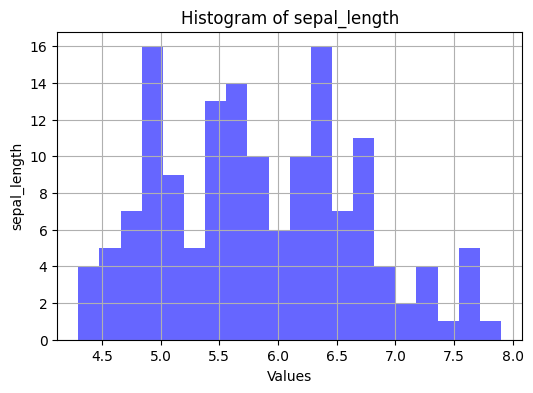

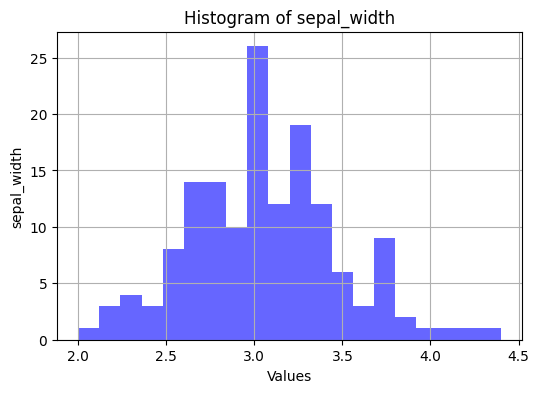

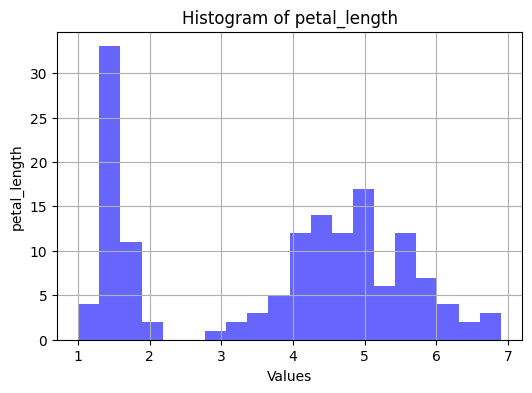

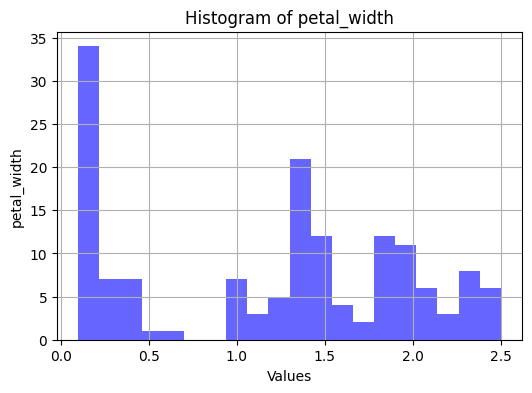

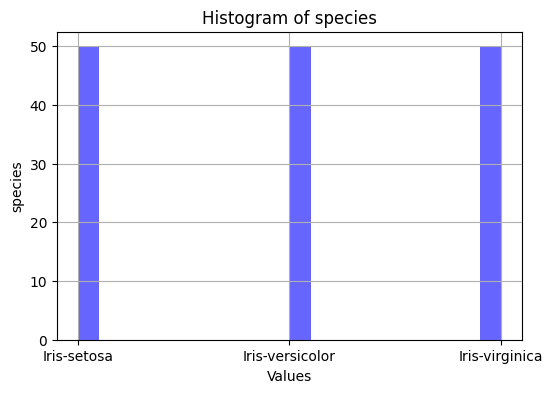

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("IRIS.csv")
df
df.info()
df.dtypes
df_numeric = df.select_dtypes(include=['number']).columns
print(df_numeric)

df_categorical = df.select_dtypes(exclude=['number']).columns
print(df_categorical)

for col in df.columns:
    df[col].hist(bins=20, figsize=(6,4), color='blue', alpha=0.6)
    plt.title(f"Histogram of {col}")
    plt.xlabel('Values')
    plt.ylabel(col)
    plt.show()

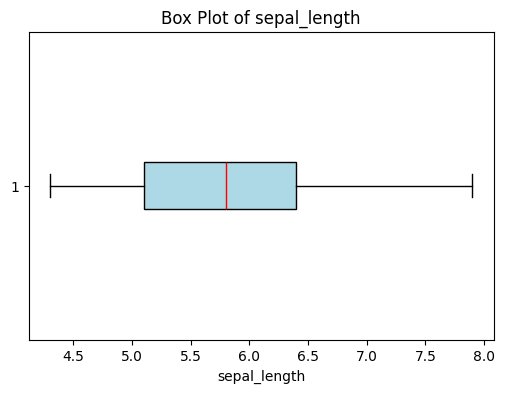

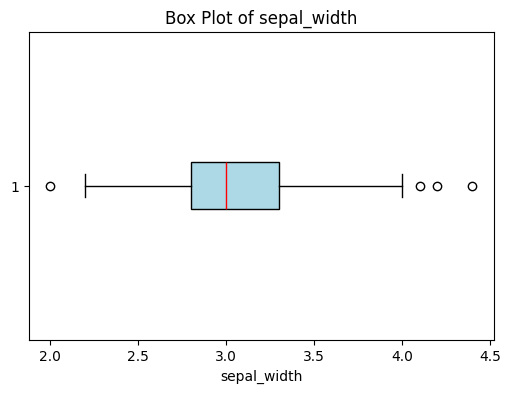

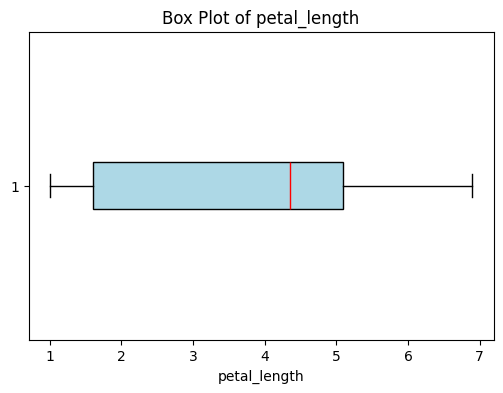

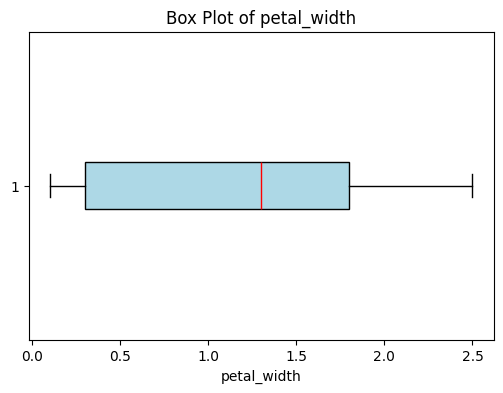

Feature-wise outlier identification and distribution insights:

Feature: sepal_length
  - Min: 4.3, Max: 7.9
  - Q1: 5.1, Median: 5.8, Q3: 6.4
  - Lower Bound: 3.1499999999999986, Upper Bound: 8.350000000000001
  - Number of Outliers: 0
  - Outlier Values: None

Feature: sepal_width
  - Min: 2.0, Max: 4.4
  - Q1: 2.8, Median: 3.0, Q3: 3.3
  - Lower Bound: 2.05, Upper Bound: 4.05
  - Number of Outliers: 4
  - Outlier Values: [4.4, 4.1, 4.2, 2.0]

Feature: petal_length
  - Min: 1.0, Max: 6.9
  - Q1: 1.6, Median: 4.35, Q3: 5.1
  - Lower Bound: -3.649999999999999, Upper Bound: 10.349999999999998
  - Number of Outliers: 0
  - Outlier Values: None

Feature: petal_width
  - Min: 0.1, Max: 2.5
  - Q1: 0.3, Median: 1.3, Q3: 1.8
  - Lower Bound: -1.95, Upper Bound: 4.05
  - Number of Outliers: 0
  - Outlier Values: None


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'IRIS.csv'  # Replace with the correct path if different
df = pd.read_csv(file_path)

# Separate numeric features for box plot generation
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# 1. Create box plots for each numeric feature
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[feature], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', edgecolor='black'),
                medianprops=dict(color='red'))
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

# 2. Discuss distributions and identify outliers
print("Feature-wise outlier identification and distribution insights:")

for feature in numeric_features:
    feature_data = df[feature]
    q1 = feature_data.quantile(0.25)  # First quartile (25th percentile)
    q3 = feature_data.quantile(0.75)  # Third quartile (75th percentile)
    iqr = q3 - q1                      # Interquartile range
    lower_bound = q1 - 1.5 * iqr       # Lower whisker
    upper_bound = q3 + 1.5 * iqr       # Upper whisker

    # Identify outliers
    outliers = feature_data[(feature_data < lower_bound) | (feature_data > upper_bound)]

    print(f"\nFeature: {feature}")
    print(f"  - Min: {feature_data.min()}, Max: {feature_data.max()}")
    print(f"  - Q1: {q1}, Median: {feature_data.median()}, Q3: {q3}")
    print(f"  - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"  - Number of Outliers: {len(outliers)}")
    print(f"  - Outlier Values: {outliers.tolist() if not outliers.empty else 'None'}")


Dataset Description:
        Updated On  State  Total Doses Administered      Sessions  \
count         7845   7845              7.621000e+03  7.621000e+03   
unique         213     37                       NaN           NaN   
top     16/01/2021  Delhi                       NaN           NaN   
freq            37    213                       NaN           NaN   
mean           NaN    NaN              9.188171e+06  4.792358e+05   
std            NaN    NaN              3.746180e+07  1.911511e+06   
min            NaN    NaN              7.000000e+00  0.000000e+00   
25%            NaN    NaN              1.356570e+05  6.004000e+03   
50%            NaN    NaN              8.182020e+05  4.547000e+04   
75%            NaN    NaN              6.625243e+06  3.428690e+05   
max            NaN    NaN              5.132284e+08  3.501031e+07   

               Sites  First Dose Administered  Second Dose Administered  \
count    7621.000000             7.621000e+03              7.621000e+03   


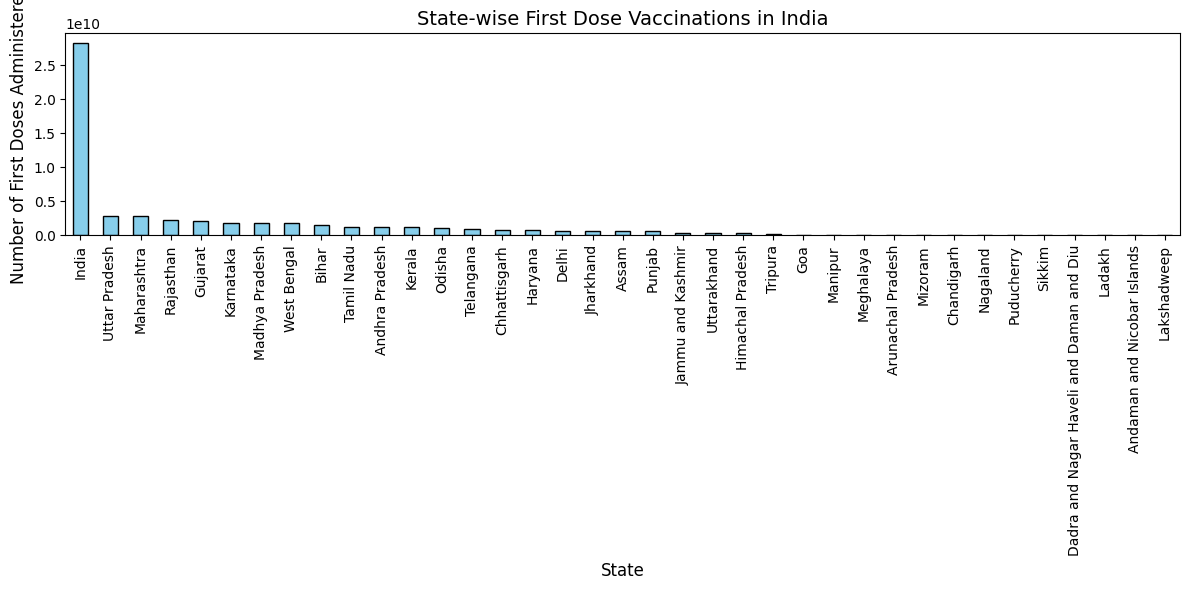

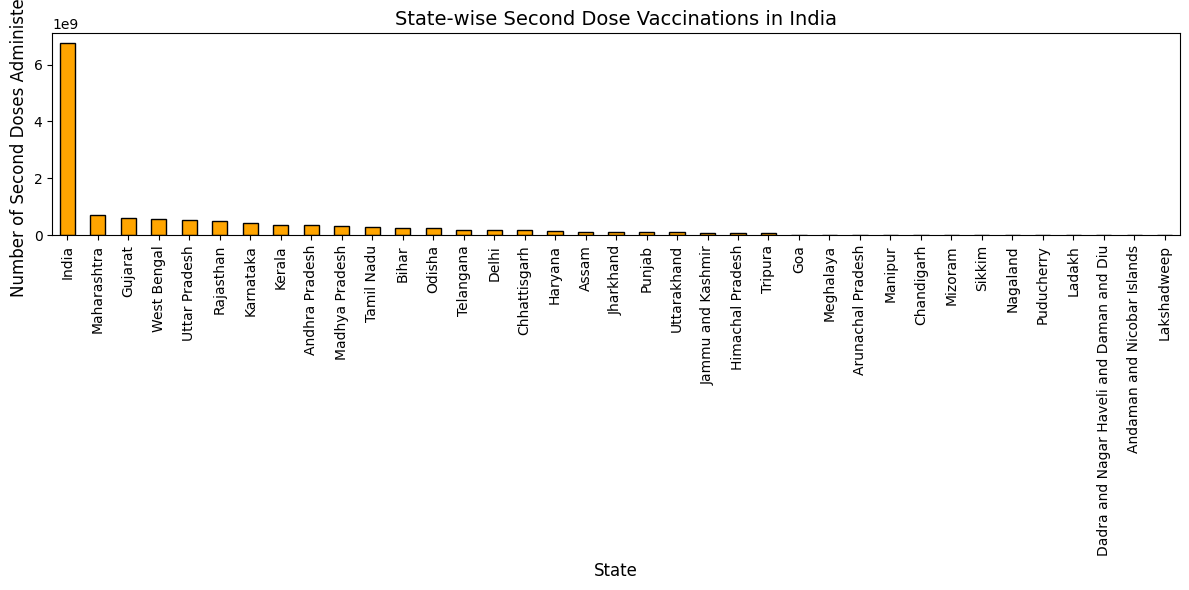

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Covid Vaccine Statewise.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# A. Describe the Dataset
print("Dataset Description:")
print(df.describe(include='all'))  # Includes numeric and non-numeric columns
print("\nDataset Information:")
print(df.info())  # Structure of the dataset
print("\nFirst Few Rows of the Dataset:")
print(df.head())

# Ensure relevant columns are numeric
df['First Dose Administered'] = pd.to_numeric(df['First Dose Administered'], errors='coerce')
df['Second Dose Administered'] = pd.to_numeric(df['Second Dose Administered'], errors='coerce')

# Filter for India (if applicable) and calculate state-wise totals
statewise_first_dose = df.groupby('State')['First Dose Administered'].sum()
statewise_second_dose = df.groupby('State')['Second Dose Administered'].sum()

# B. Number of persons state-wise vaccinated for the first dose in India
print("\nState-wise First Dose Vaccination Totals:")
print(statewise_first_dose)

# C. Number of persons state-wise vaccinated for the second dose in India
print("\nState-wise Second Dose Vaccination Totals:")
print(statewise_second_dose)

# Visualization for State-wise First Dose Vaccination
plt.figure(figsize=(12, 6))
statewise_first_dose.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('State-wise First Dose Vaccinations in India', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of First Doses Administered', fontsize=12)
# plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

# Visualization for State-wise Second Dose Vaccination
plt.figure(figsize=(12, 6))
statewise_second_dose.sort_values(ascending=False).plot(kind='bar', color='orange', edgecolor='black')
plt.title('State-wise Second Dose Vaccinations in India', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Second Doses Administered', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()



In [21]:
# Step 1: Import required libraries
import pandas as pd

df = pd.read_csv("Covid Vaccine Statewise.csv")

print("Dataset Description:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nNumber of Males vaccinated:")
# Sum up the males vaccinated column
males_vaccinated = df['Male(Individuals Vaccinated)'].sum()
print(f"Total number of males vaccinated: {males_vaccinated}")

# Step 5: Number of Females Vaccinated
print("\nNumber of Females vaccinated:")
# Sum up the females vaccinated column
females_vaccinated = df['Female(Individuals Vaccinated)'].sum()
print(f"Total number of females vaccinated: {females_vaccinated}")

Dataset Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShiel

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.0000

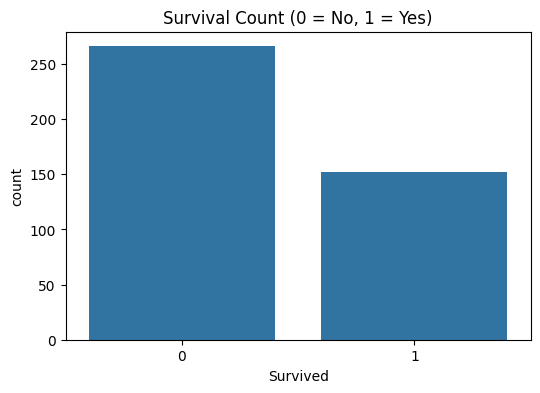

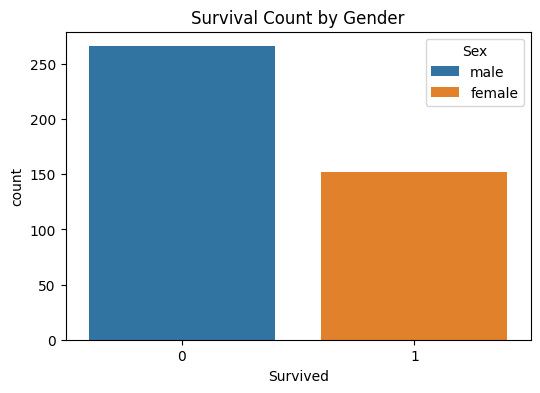

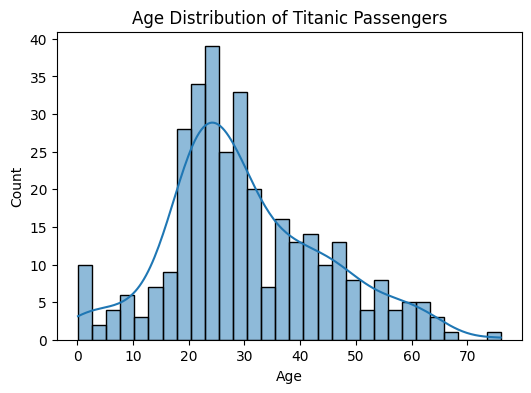

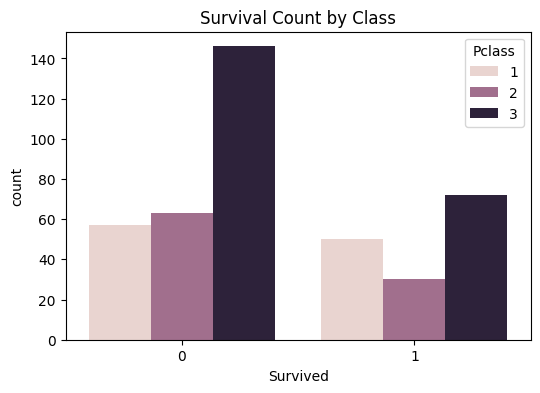

ValueError: Could not interpret value `Survived` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the Titanic dataset from the specified file path
file_path = r"Titanic.csv"
titanic = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(titanic.head())

# Basic statistics of the dataset
print(titanic.describe())

# Visualize the count of survivors vs non-survivors 3. Survival Count (Univariate Analysis)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

# Survival rate based on gender 4. Survival by Gender (Categorical Analysis)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survival Count by Gender')
plt.show()

# Age distribution of passengers 5. Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(titanic['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution of Titanic Passengers')
plt.show()

# Survival rate based on class 6. Survival by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=titanic)
plt.title('Survival Count by Class')
plt.show()

# Step 6: Fare Distribution Based on Survival
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Survived', y='Fare', palette='Set3')
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()


# Relationship between age and survival 7. Survival vs. Age (Box Plot)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Survival vs Age')
plt.show()

# Filter out non-numeric columns for correlation calculation 8. Correlation Heatmap
numeric_columns = titanic.select_dtypes(include=['float64', 'int64']).columns
titanic_numeric = titanic[numeric_columns]

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


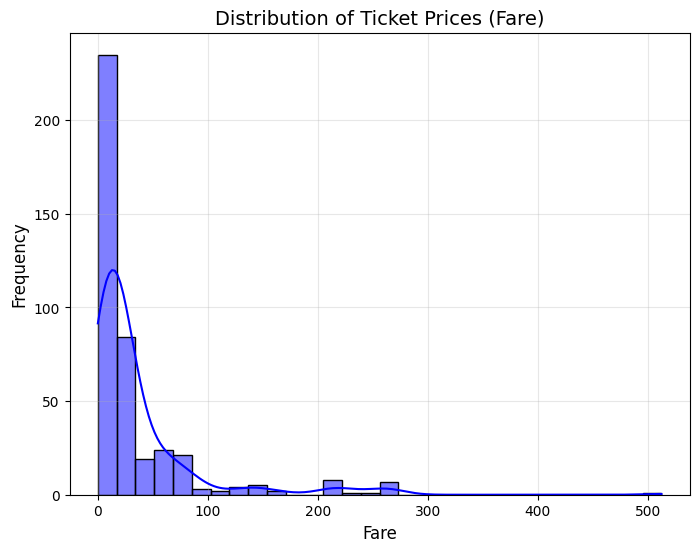

512.3292

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the Titanic dataset directly from seaborn's inbuilt dataset
titanic = pd.read_csv('Titanic.csv')

# Check the first few rows of the dataset to confirm it's loaded correctly
print(titanic.head())

# Plot the distribution of the 'fare' column using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(titanic['Fare'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribution of Ticket Prices (Fare)', fontsize=14)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)  # Optional: Add a grid for better readability
plt.show()

titanic['Fare'].min()
titanic['Fare'].max()


In [24]:
# Given confusion matrix values
TP = 1
FN = 8
FP = 1
TN = 90

# Compute metrics
accuracy = (TP + TN) / (TP + FN + FP + TN)
error_rate = 1 - accuracy
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

# Display results
print(f"Accuracy: {accuracy:.2%}")
print(f"Error Rate: {error_rate:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")


Accuracy: 91.00%
Error Rate: 9.00%
Precision: 50.00%
Recall: 11.11%


In [25]:
import pandas as pd

file_path = 'House Data.csv'
df = pd.read_csv(file_path)

quantitative_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
del quantitative_columns[0]

if 'price' in df.columns:
    df['price_cleaned'] = df['price'].str.replace(r'[^\d]', '', regex=True).astype(float)
    quantitative_columns.append('price_cleaned')

categorical_var = df['district']

agg_funcs = {col: ['mean', 'median', 'min', 'max', 'std'] for col in quantitative_columns}
summary_stats = df.groupby(categorical_var).agg(agg_funcs)

summary_stats = summary_stats.reset_index()

print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
         district NumberFloorsofBuilding                            \
                                    mean median min max        std   
0          adalar               2.576923    3.0   2   4   0.577794   
1      arnavutkoy               4.343750    4.0   1  14   1.730635   
2        atasehir               8.592593    5.0   1  71   9.185859   
3         avcilar               6.931404    5.0   1  31   6.002468   
4        bagcilar              10.074713    6.0   2  33   7.241659   
5    bahcelievler               5.025192    5.0   2  20   2.188763   
6        bakirkoy               6.365527    5.0   2  25   4.613012   
7      basaksehir              10.190760    7.0   1  38   7.757479   
8      bayrampasa               5.109195    5.0   2  23   3.208483   
9        besiktas               8.127466    5.0   1  50   7.935654   
10         beykoz               3.898649    3.0   1  30   4.887496   
11     beylikduzu               6.350225    5.0   1  31   3.802936   

In [26]:
import pandas as pd

# Load the iris dataset
df = pd.read_csv("IRIS.csv")  # Rename iris_data to df for clarity

# Display unique species in the dataset
print("Unique species in the dataset:", df['species'].unique())

# Filter data for each species
setosa = df[df['species'] == 'Iris-setosa']
versicolor = df[df['species'] == 'Iris-versicolor']
virginica = df[df['species'] == 'Iris-virginica']

df.dtypes

def display_stats(species_name, species_data):
    numericdf = species_data.select_dtypes(include=['number'])
    print(f"\nStatistics for {species_name}:")
    # print(numericdf.describe(percentiles=[0.25, 0.5, 0.75]
    print(f"\nPercentiles for {species_name}:")
    percentiles = numericdf.describe(percentiles=[0.25, 0.5, 0.75]).loc[['25%', '50%', '75%']]
    print(percentiles)
    print(f"\nMean for {species_name}:")
    print(numericdf.mean())
    print(f"\nStandard Deviation for {species_name}:")
    print(numericdf.std())
    # print(species_data.describe())  # Displays mean, standard deviation, percentiles, etc.

    # Display statistics for each species
display_stats('Iris-setosa', setosa)
display_stats('Iris-versicolor', versicolor)
display_stats('Iris-virginica', virginica)

Unique species in the dataset: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Statistics for Iris-setosa:

Percentiles for Iris-setosa:
     sepal_length  sepal_width  petal_length  petal_width
25%           4.8        3.125         1.400          0.2
50%           5.0        3.400         1.500          0.2
75%           5.2        3.675         1.575          0.3

Mean for Iris-setosa:
sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64

Standard Deviation for Iris-setosa:
sepal_length    0.352490
sepal_width     0.381024
petal_length    0.173511
petal_width     0.107210
dtype: float64

Statistics for Iris-versicolor:

Percentiles for Iris-versicolor:
     sepal_length  sepal_width  petal_length  petal_width
25%           5.6        2.525          4.00          1.2
50%           5.9        2.800          4.35          1.3
75%           6.3        3.000          4.60          1.5

Mean for Iris-versicolor:
sepal_length    5.936
s

In [27]:
import numpy as np
import pandas as pd
import random

# Load the Iris dataset
file_path = "IRIS.csv"  # Update this to the correct path of your iris.csv file
df = pd.read_csv(file_path)

# Select the numerical columns (sepal_length, sepal_width, petal_length, petal_width)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

# Initialize K (number of clusters)
K = 3
iterations = 10

# Step 1: Randomly initialize the cluster centroids as data points
random_indices = random.sample(range(len(X)), K)  # Randomly choose K indices from the dataset
centroids = X[random_indices]  # Initialize centroids with the selected data points

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to assign points to the closest centroid
def assign_clusters(X, centroids):
    clusters = {i: [] for i in range(K)}  # Create an empty list for each cluster
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]  # Calculate distances from all centroids
        closest_centroid = np.argmin(distances)  # Find the index of the closest centroid
        clusters[closest_centroid].append(point)  # Assign the point to the closest centroid
    return clusters

# Function to update centroids (mean of all points in a cluster)
def update_centroids(clusters):
    new_centroids = []
    for i in range(K):
        new_centroid = np.mean(clusters[i], axis=0)  # Calculate the mean of the points in cluster i
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

# K-means clustering algorithm
for i in range(iterations):
    print(f"Iteration {i+1}:")

    # Step 2: Assign points to the closest centroid
    clusters = assign_clusters(X, centroids)

    # Step 3: Update the centroids
    new_centroids = update_centroids(clusters)

    # Check if centroids have changed, if not, break early
    if np.all(centroids == new_centroids):
        print("Centroids have converged, stopping early.")
        break

    # Set the new centroids for the next iteration
    centroids = new_centroids

# Step 4: Print the final cluster means (centroids)
print("\nFinal cluster means (centroids):")
print(centroids)
# for i, centroid in enumerate(centroids):
#     print(f"Cluster {i+1}: {centroid}")


Iteration 1:
Iteration 2:
Iteration 3:
Iteration 4:
Iteration 5:
Iteration 6:
Centroids have converged, stopping early.

Final cluster means (centroids):
[[4.77586207 3.07241379 1.62068966 0.29655172]
 [5.28333333 3.70833333 1.49166667 0.27916667]
 [6.30103093 2.88659794 4.95876289 1.69587629]]


In [28]:
import numpy as np
import pandas as pd
import random

filepath='IRIS.csv'
df=pd.read_csv(filepath)

x=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
k=4
iterations=10

random_indices=random.sample(range(len(x)),k)
centroids=x[random_indices]

def euclidian_dist(a1,a2):
    return np.sqrt(np.sum((a1-a2)**2))

def assign_clusters(x,centroids):
    clusters={i:[] for i in range(k)}
    for point in x:
        distance=[euclidian_dist(point,centroid) for centroid in centroids]
        closes=np.argmin(distance)
        clusters[closes].append(point)
    return clusters

def update_centroid(clusters):
    new_centroids=[]
    for i in range(k):
        new_cnetroid=np.mean(clusters[i],axis=0)
        new_centroids.append(new_cnetroid)
    return np.array(new_centroids)

for i in range(iterations):
    print(f"Iteration",i+1)

    clusters=assign_clusters(x,centroids)
    new_centroids=update_centroid(clusters)

    if np.all(centroids==new_centroids):
        print("coverged")
        break

    centroids=new_centroids

print("\n final centroids:")
print(centroids)





Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
coverged

 final centroids:
[[5.52962963 2.62222222 3.94074074 1.21851852]
 [6.23658537 2.85853659 4.80731707 1.62195122]
 [5.006      3.418      1.464      0.244     ]
 [6.9125     3.1        5.846875   2.13125   ]]


In [29]:
TP = 90  # True Positives
FP = 140  # False Positives
FN = 210  # False Negatives
TN = 9560  # True Negatives

# Calculate metrics
# 1. Accuracy
accuracy = (TP + TN) / (TP + FP + FN + TN)

# 2. Error Rate
error_rate = 1 - accuracy

# 3. Precision
precision = TP / (TP + FP) if (TP + FP) != 0 else 0

# 4. Recall
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

# 5. F1 Score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Display results
print("Accuracy", accuracy)
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Accuracy 0.965
Accuracy: 0.96
Error Rate: 0.04
Precision: 0.39
Recall: 0.30
F1 Score: 0.34


In [30]:
import pandas as pd
import numpy as np

# Load data into a DataFrame
df = pd.read_excel('Age Table.xlsx')

# Frequency table for Age
freq_table = df['Age'].value_counts()
print("Frequency Table for Age:\n", freq_table)

# Function to calculate entropy
def entropy(column):
    counts = column.value_counts()
    probabilities = counts / len(column)
    return -sum(probabilities * np.log2(probabilities))

# Calculate entropy of the whole dataset
overall_entropy = entropy(df['Class'])
print("\nOverall Entropy:", overall_entropy)

# Calculate entropy for each Age group
age_groups = df.groupby('Age')
weighted_entropy = 0
for group_name, group in age_groups:
    group_entropy = entropy(group['Class'])
    weighted_entropy += (len(group) / len(df)) * group_entropy
    print(f"Entropy for Age = {group_name}: {group_entropy}")
    print(group)

# Calculate Information Gain
information_gain = overall_entropy - weighted_entropy
print("\nInformation Gain for split on Age:", information_gain)

Frequency Table for Age:
 Age
Old       5
Young     4
Middle    4
Young     1
Name: count, dtype: int64

Overall Entropy: 0.9402859586706311
Entropy for Age = Middle: -0.0
       Age Income Married Health  Class
2   Middle   High      No    Fair   Yes
6   Middle    Low     Yes    Good   Yes
11  Middle     No      No    Good   Yes
12  Middle    Yes     Yes    Fair   Yes
Entropy for Age = Old: 0.9709505944546686
    Age  Income Married Health  Class
3   Old  Medium      No    Fair   Yes
4   Old     Low     Yes    Fair   Yes
5   Old     Low     Yes    Good    No
9   Old  Medium     Yes    Fair   Yes
13  Old      No      No    Good    No
Entropy for Age = Young: 0.8112781244591328
     Age  Income Married Health  Class
0  Young    High      No    Fair    No
1  Young    High      No    Good    No
7  Young  Medium      No    Fair    No
8  Young     Low     Yes    Fair   Yes
Entropy for Age = Young : -0.0
       Age  Income Married Health  Class
10  Young   Medium     Yes    Good   Yes

Infor

In [31]:
import pandas as pd

# Load the dataset
file_path = 'Ecommerce Customers.csv'
data = pd.read_csv(file_path)

# 1. Count unique values in each column
unique_counts = data.nunique()

# 2. Check the format of each column
column_formats = data.dtypes

# 3. Handle missing values (filling numeric columns with their mean)
data_filled = data.copy()
print("missing values:")
print(data_filled.isnull().sum())
numeric_columns = data_filled.select_dtypes(include=['number']).columns
data_filled[numeric_columns] = data_filled[numeric_columns].fillna(data_filled[numeric_columns].mean())

# 4. Verify missing values after filling
missing_after_fill = data_filled.isnull().sum()

# 5. Convert variables: Example of converting numeric columns
# Convert `Yearly Amount Spent` to an integer
data_filled['Yearly Amount Spent'] = data_filled['Yearly Amount Spent'].astype(int)

# Convert `Time on App` to string
data_filled['Time on App'] = data_filled['Time on App'].astype(str)

# Convert `Length of Membership` to integer
data_filled['Length of Membership'] = data_filled['Length of Membership'].astype(int)

# Convert `Avg. Session Length` to a string
data_filled['Avg. Session Length'] = data_filled['Avg. Session Length'].astype(str)

# Display results
print("\nUnique Value Counts:\n", unique_counts)
print("\nColumn Formats Before Conversion:\n", column_formats)
print("\nMissing Values After Filling:\n", missing_after_fill)
print("\nUpdated Column Formats After Conversions:\n", data_filled.dtypes)


missing values:
Email                   0
Address                 0
Avatar                  0
Avg. Session Length     7
Time on App             3
Time on Website         4
Length of Membership    7
Yearly Amount Spent     4
dtype: int64

Unique Value Counts:
 Email                   500
Address                 500
Avatar                  138
Avg. Session Length     493
Time on App             497
Time on Website         496
Length of Membership    493
Yearly Amount Spent     496
dtype: int64

Column Formats Before Conversion:
 Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

Missing Values After Filling:
 Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of

In [32]:
import pandas as pd
import numpy as np
# Load the dataset
file_path = 'Ecommerce Customers.csv'
data = pd.read_csv(file_path)

# 1. Data Cleaning

# Handle missing values
# Filling numeric columns with their mean
numeric_columns = data.select_dtypes(include=['integer']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Verify there are no missing values
missing_values = data.isnull().sum()

# Remove unnecessary columns
# Example: Remove "Email", "Address", and "Avatar" as they may not be useful for analysis
data_cleaned = data.drop(columns=['Email', 'Address', 'Avatar'], errors='ignore')

# 2. Data Transformation

# Convert numerical columns to appropriate data types
data_cleaned['Yearly Amount Spent'].dropna(inplace=True, axis=0)

# Handle non-finite values
# Replace NaN with the median value of the column
data_cleaned['Yearly Amount Spent'].fillna(data_cleaned['Yearly Amount Spent'].median(), inplace=True)

# Replace inf values with a finite value (e.g., the maximum of valid values)
finite_max = data_cleaned.loc[~data_cleaned['Yearly Amount Spent'].isin([np.inf, -np.inf]), 'Yearly Amount Spent'].max()
data_cleaned['Yearly Amount Spent'].replace([np.inf, -np.inf], finite_max, inplace=True)

data_cleaned['Yearly Amount Spent'] = data_cleaned['Yearly Amount Spent'].astype(int)

# Replace NaN with the median value of the column
data_cleaned['Length of Membership'].fillna(data_cleaned['Length of Membership'].median(), inplace=True)

# Replace inf values with a finite value (e.g., the maximum of valid values)
finite_max = data_cleaned.loc[~data_cleaned['Length of Membership'].isin([np.inf, -np.inf]), 'Length of Membership'].max()
data_cleaned['Length of Membership'].replace([np.inf, -np.inf], finite_max, inplace=True)

data_cleaned['Length of Membership'] = data_cleaned['Length of Membership'].astype(int)

# Create new feature columns
# Example: Add a new column for interaction between "Time on App" and "Time on Website"
data_cleaned['App_Web_Interaction'] = data_cleaned['Time on App'] * data_cleaned['Time on Website']

# Normalize numeric columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int']).columns
data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])

# 3. Encoding categorical variables
# If any categorical columns exist, encode them. (None are left after cleaning in this case)

# 4. Save the cleaned and transformed dataset
cleaned_file_path = 'Ecommerce_Customers_Cleaned.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

# Display the cleaned and transformed data
print("Missing Values After Cleaning:\n", missing_values)
print("\nCleaned Data Sample:\n", data_cleaned.head())
print(f"\nCleaned and transformed dataset saved to: {cleaned_file_path}")


Missing Values After Cleaning:
 Email                   0
Address                 0
Avatar                  0
Avg. Session Length     7
Time on App             3
Time on Website         4
Length of Membership    7
Yearly Amount Spent     4
dtype: int64

Cleaned Data Sample:
    Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0             0.751425     0.626620         0.929816              0.666667   
1             0.362306     0.393016         0.550801              0.333333   
2             0.524953     0.426378         0.524803              0.666667   
3             0.722409     0.787050         0.460890              0.500000   
4             0.574861     0.647702         0.594748              0.666667   

   Yearly Amount Spent  App_Web_Interaction  
0             0.650295             0.762904  
1             0.267191             0.430244  
2             0.453831             0.454896  
3             0.638507             0.773796  
4             0.673870   

<ipython-input-32-219b03672750>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Yearly Amount Spent'].fillna(data_cleaned['Yearly Amount Spent'].median(), inplace=True)
<ipython-input-32-219b03672750>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh